In [171]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [172]:
df = pd.read_csv('../Data-processed/crop_recommendation.csv')

In [173]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [174]:
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [175]:
df.tail(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2190,103,40,30,27.309018,55.196224,6.348316,141.483164,coffee
2191,118,31,34,27.548230,62.881792,6.123796,181.417081,coffee
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,coffee
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,coffee
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [176]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [177]:
df['label'].value_counts()

banana         100
apple          100
coffee         100
coconut        100
mango          100
mungbean       100
grapes         100
watermelon     100
pigeonpeas     100
papaya         100
lentil         100
pomegranate    100
rice           100
kidneybeans    100
chickpea       100
muskmelon      100
mothbeans      100
cotton         100
blackgram      100
jute           100
orange         100
maize          100
Name: label, dtype: int64

In [178]:
corelation=df.corr()

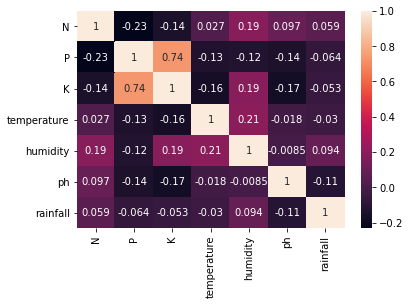

In [179]:
sns.heatmap(corelation,annot=True)

In [180]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [181]:
pr = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
var = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [182]:
acc = []
model = []

In [183]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(pr,var,test_size = 0.5,random_state =3)

In [184]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(Xtrain,Ytrain)

predicted_values = DT.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  89.54545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        43
      banana       0.98      1.00      0.99        51
   blackgram       0.68      0.98      0.80        44
    chickpea       1.00      0.98      0.99        54
     coconut       0.90      1.00      0.95        52
      coffee       1.00      0.94      0.97        53
      cotton       1.00      1.00      1.00        46
      grapes       1.00      1.00      1.00        60
        jute       0.65      0.96      0.77        46
 kidneybeans       0.00      0.00      0.00        53
      lentil       0.92      1.00      0.96        61
       maize       0.85      0.93      0.88        54
       mango       1.00      0.89      0.94        57
   mothbeans       1.00      0.51      0.68        45
    mungbean       1.00      1.00      1.00        44
   muskmelon       1.00      1.00      1.00        54
      orange       1.00      1.00

In [185]:
from sklearn.model_selection import cross_val_score

In [186]:
s = cross_val_score(DT, features, target,cv=5)

In [187]:
s

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [188]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = '../models/DT.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DT, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [189]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=4)

LR.fit(Xtrain,Ytrain)

predLR = LR.predict(Xtest)

x = metrics.accuracy_score(Ytest, predLR)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predLR))

Logistic Regression's Accuracy is:  0.95
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        43
      banana       0.98      1.00      0.99        51
   blackgram       0.82      0.91      0.86        44
    chickpea       1.00      1.00      1.00        54
     coconut       1.00      0.98      0.99        52
      coffee       0.96      1.00      0.98        53
      cotton       0.88      0.93      0.91        46
      grapes       1.00      1.00      1.00        60
        jute       0.76      0.70      0.73        46
 kidneybeans       1.00      1.00      1.00        53
      lentil       0.98      0.93      0.96        61
       maize       0.94      0.83      0.88        54
       mango       1.00      0.98      0.99        57
   mothbeans       0.89      0.87      0.88        45
    mungbean       0.96      1.00      0.98        44
   muskmelon       1.00      1.00      1.00        54
      orange       1.00      1.00      1

In [190]:
import pickle
LR_pkl_filename = '../models/LR.pkl'
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LR, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

In [191]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
RF = RandomForestClassifier(n_estimators=15, random_state=0)
RF.fit(Xtrain,Ytrain)

RandomForestClassifier(n_estimators=15, random_state=0)

In [193]:
P_values=RF.predict(Xtest)

In [194]:


x = metrics.accuracy_score(Ytest, P_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,P_values))

RF's Accuracy is:  0.9890909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        43
      banana       1.00      1.00      1.00        51
   blackgram       0.98      1.00      0.99        44
    chickpea       1.00      1.00      1.00        54
     coconut       1.00      1.00      1.00        52
      coffee       1.00      1.00      1.00        53
      cotton       1.00      1.00      1.00        46
      grapes       1.00      1.00      1.00        60
        jute       0.83      0.98      0.90        46
 kidneybeans       1.00      1.00      1.00        53
      lentil       0.98      1.00      0.99        61
       maize       1.00      1.00      1.00        54
       mango       1.00      1.00      1.00        57
   mothbeans       1.00      0.96      0.98        45
    mungbean       1.00      1.00      1.00        44
   muskmelon       1.00      1.00      1.00        54
      orange       1.00      1.00      1.00

In [195]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../models/RanFor.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [197]:
import xgboost as xgb
XGB = xgb.XGBClassifier()
XGB.fit(Xtrain,Ytrain)

pr = XGB.predict(Xtest)

x = metrics.accuracy_score(Ytest, pr)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,pr))

[19:28:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  0.9845454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        43
      banana       1.00      1.00      1.00        51
   blackgram       0.96      1.00      0.98        44
    chickpea       1.00      1.00      1.00        54
     coconut       1.00      0.96      0.98        52
      coffee       1.00      1.00      1.00        53
      cotton       0.98      1.00      0.99        46
      grapes       1.00      1.00      1.00        60
        jute       0.85      1.00      0.92        46
 kidneybeans       1.00      1.00      1.00        53
      lentil       1.00      0.98      0.99        

In [196]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [199]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = '../models/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XGB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

In [200]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

NB.fit(Xtrain,Ytrain)

pred = NB.predict(Xtest)
x = metrics.accuracy_score(Ytest, pred)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,pred))

Naive Bayes's Accuracy is:  0.9927272727272727
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        43
      banana       1.00      1.00      1.00        51
   blackgram       1.00      1.00      1.00        44
    chickpea       1.00      1.00      1.00        54
     coconut       1.00      1.00      1.00        52
      coffee       1.00      1.00      1.00        53
      cotton       1.00      1.00      1.00        46
      grapes       1.00      1.00      1.00        60
        jute       0.88      1.00      0.94        46
 kidneybeans       1.00      1.00      1.00        53
      lentil       0.98      0.98      0.98        61
       maize       1.00      1.00      1.00        54
       mango       1.00      1.00      1.00        57
   mothbeans       0.98      0.98      0.98        45
    mungbean       1.00      1.00      1.00        44
   muskmelon       1.00      1.00      1.00        54
      orange       1.00      1.00 

In [203]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/NB.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NB, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

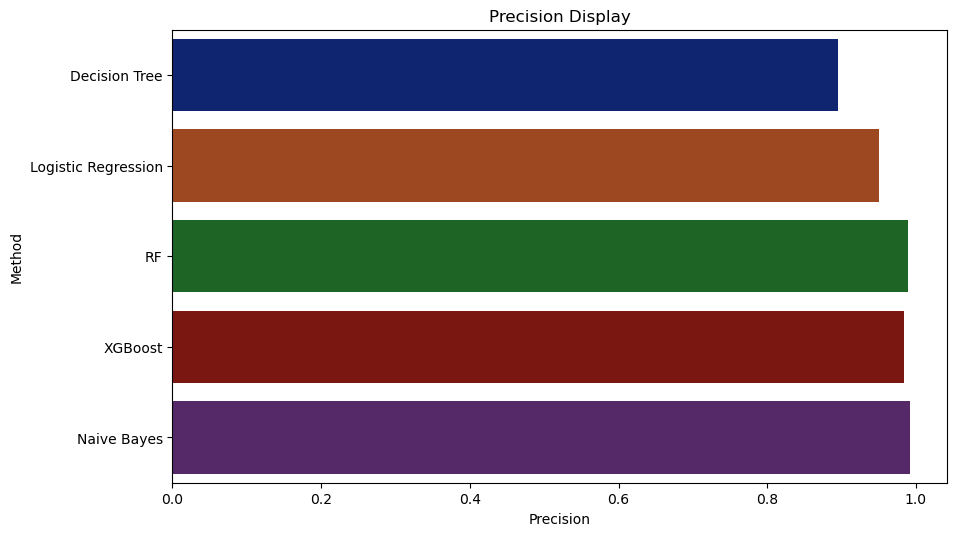

In [204]:
plt.figure(figsize=[10,6],dpi = 100)
plt.title('Precision Display')
plt.xlabel('Precision')
plt.ylabel('Method')
sns.barplot(x = acc,y = model,palette='dark')

In [205]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']
